# Data Wrangling  By Aman Jain

  
   ## Introduction 

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

The goal of this project is to wrangle data from WeRateDogs Twitter's account using Python and document the whole process in a Jupyter Notebook named wrangle_act.ipynb i.e. this notebook. My aim is to wrangle this data for interesting and trustworthy analyses using visualizations.

   ## Project Details
    
    
Fully assessing and cleaning the entire dataset would require exceptional effort so only a subset of its issues (eight quality issues and two tidiness issues at minimum)needed to be assessed and cleaned.The tasks for this project were:
    
    1. Data wrangling which consist of:
        a. Data Gathering 
        b. Data Acessing 
        c. Data Cleaning.
    2. Data Visualization 
    
 ## Tools Used
 
 * Python
 * Pandas 
 * matplotlib
 * seaborn
 * Tweepy(twitter Api)
    

## Data Gathering 

  Here, Data is gathered from three diffrent source assigned in the project:
  
  ### Enhanced Twitter Archive
  
The **WeRateDogs** Twitter archive provided by Udacity. This contains basic tweet data for all 5000+ of their tweets, but not everything.I manually downloaded this file manually **twitter_archive_enhanced.csv**.


  ### Image Predictions File

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: 
[image_predictions.tsv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)
   
   
 ### Additional Data via the Twitter API( Tweepy)
 
Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called **tweet_json.txt** file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.



   
   

## Data Acessing Report

### twitter_enhanced_df

1. twitter_id must be string instead of integer. **(Programatic Acessment)**.
2. timestamp must be in datetime format instead of string. **(Programatic Acessment)**.
3. there are many non meaningful names of dog's in the data. **(Visual Accessment)**. ex a,officialy etc.
4. source feild contains tags which is not understandable to normal people **(Visual Acessment)**.
5. there is error in the entries of rating_denominator and rating_neumrator because it  do not satisfy the denomirator rating concept as there in @rate_dogs also known as weratedogs. **(Programatic + Visual Acessment+BrainStorming)**. 
**I quote " These ratings almost always have a denominator of 10" **.

**we have to change bot ratings to float and also correct the actual rated value on numerator.**

6. there are columns of not  such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id ,retweeted_status_timestamp. **(Visual + Programatic assesment).

7. There are 4 columns for dog stages (doggo, floofer, pupper, puppo) there is lot of memory waste due to this.

### df_image_predictions

1. removing three diffrent column p1_conf,p2_conf,p3_conf representing same concept andcon ver it ino confidence.

### df_tweets_json

1. join the dataframe with above 2 dataframe.


# Data Cleaning 

In [ ]:
# first i created copy of dataframes
twitter_enhanced_clean = twitter_enhanced_df.copy()
df_image_predictions_clean = df_image_predictions.copy() 
df_tweets_json_clean = df_tweets_json.copy()

## Issue No - 1  (Tidyness)

   ### Define
  Resolving the  structural issue  dut to 3 diffrent tables by merging the 3 dataframes into one. And then we will have only 1 dataframe to clean and process

### Code 
"""
twitter_enhanced_clean = pd.merge(left=twitter_enhanced_df,
                                 right=df_tweets_json_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
                                 """

"""
twitter_enhanced_clean = twitter_enhanced_clean.merge(df_image_predictions_clean, on='tweet_id', how='inner')"""

## Issue No - 2  (Quality)
 
### Define 

Clean the content of source column, make it more readable.

### Code

#removing the tabs


twitter_enhanced_clean['source'] = twitter_enhanced_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)

## Issue No - 3 (Tidyness)

### Define

Define new column for life stage of dog by melting the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column life_stage.


### Code 

melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in twitter_enhanced_clean.columns.tolist() if x not in melt_columns]

##### Melt the the columns into values
twitter_enhanced_clean = pd.melt(twitter_enhanced_clean, id_vars = stay_columns, value_vars = melt_columns, 
                         var_name = 'stages', value_name = 'life_stage')

## Issue No - 4 (Quality)

### Define

Clean data by dropping duplicates row(retweets) and not meaningful columns.

### Code

#### Delete the retweets
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean.retweeted_status_id.isna()]

#### Delete columns we don't need anymore
twitter_enhanced_clean = twitter_enhanced_clean.drop('retweeted_status_id', 1)
twitter_enhanced_clean = twitter_enhanced_clean.drop('retweeted_status_user_id', 1)
twitter_enhanced_clean = twitter_enhanced_clean.drop('retweeted_status_timestamp', 1)
twitter_enhanced_clean = twitter_enhanced_clean.drop('in_reply_to_status_id',1)
twitter_enhanced_clean = twitter_enhanced_clean.drop('in_reply_to_user_id',1)
#imported from the API but has same values as timestamp column

twitter_enhanced_clean = twitter_enhanced_clean.drop('date_time', 1)

#### Delete duplicated tweet_id
twitter_enhanced_clean = twitter_enhanced_clean.drop_duplicates()

#### Delete tweets with no pictures
twitter_enhanced_clean = twitter_enhanced_clean.dropna(subset = ['jpg_url'])

#Delete dog_stage duplicates
twitter_enhanced_clean = twitter_enhanced_clean.sort_values('life_stage').drop_duplicates('tweet_id', keep = 'last')

## Issue No - 5 (Quality)

### Define

Datatype of timestamp is string convert it into datetime format.

### Code 

twitter_enhanced_clean.timestamp = pd.to_datetime(twitter_enhanced_clean.timestamp)

## Issue No - 6 (Quality)

### Define

Datatype of tweet_id is int64 convert it into str.

### Code



twitter_enhanced_clean.tweet_id = twitter_enhanced_clean.tweet_id.to_string();

## Issue No - 7

### Define 
converting non-meaningful names into 'None' in 'name' section.

### Code 

#### Step 1 changing their names to Nan
twitter_enhanced_clean.name = twitter_enhanced_clean.name.replace(['such', 'an', 'the', 'just', 'by', 'a', 'mad', 'old', 'space', 
             'quite', 'actually', 'infuriating', 'all', 'officially', 'my', 'unacceptable', 'incredibly',
              'not', '0', 'life', 'one', 'his', 'very'],np.NaN)
#### Step 2 changing this NaN to 'None'.

**put all NaN values in "None"**

twitter_enhanced_clean.name=twitter_enhanced_clean.name.fillna(value="None")


## Issue No - 8 
*(Most time taking and difficult wrangling due to this)*.
### Define 

* changing datatype of ratings and correctingrating_numerator and also the the rating_denomirator.
* Datatype firstly changed to float it apllies for both rating_numerator and for 


def value_change_Numerator(df,l,att_change,t):
    
    """Creating hack to change the values"""
    
    for i in range (0,len(l)):
    
        df.loc[[l[i]],str(att_change)] = t[i]
    
    return 

* Datatype firstly changed to float it apllies for both rating_numerator and for 

def value_change_denomirator(df,l,att_change):
    
    """Creating hack to change the values"""
    
    for i in range (0,len(l)):
        
        df.loc[[l[i]],str(att_change)] = 10
    
    return 

### Code

twitter_enhanced_clean.rating_numerator = twitter_enhanced_clean.rating_numerator.astype(float)
twitter_enhanced_clean.rating_denominator = twitter_enhanced_clean.rating_denominator.astype(float)

value_change_Numerator(twitter_enhanced_clean,list_dec_num_rating_index,'rating_numerator',values_to_map_num)

In [ ]:
twitter_enhanced_clean.loc[[list_dec_num_rating_index[0]]]

In [ ]:
twitter_enhanced_clean.loc[[list_dec_num_rating_index[0]]].rating_numerator

## Issue No - 9

### Define 

Refine p1, p2 and p3 columns and  p1_conf, p2_conf, p3_conf to *Prediction* and *confidence*.

### Code

In [ ]:
# store the true algo with it's level of confidence and if false put NaN as confidence
Prediction = []
Confidence = []

def get_Prediction_Confidence(dataframe):
    if dataframe['p1_dog'] == True:
        Prediction.append(dataframe['p1'])
        Confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        Prediction.append(dataframe['p2'])
        Confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        Prediction.append(dataframe['p3'])
        Ponfidence.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence.append(0)
    return

twitter_enhanced_clean.apply(get_Prediction_Confidence, axis=1)
twitter_enhanced_clean['prediction'] = prediction
twitter_enhanced_clean['confidence'] = confidence

## Issue No - 10 (Quality).
### Define

Doing feature engineering

### Code

#### drop the not required columns of image prediction information
twitter_enhanced_clean = twitter_enhanced_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

In [ ]:
# Loop on all the texts and check if it has one of pronouns of male or female; add that to list.

male_pronouns = ['He', 'he', 'him', 'his', "he's", 'himself']
female_pronouns = ['She', 'she', 'her', 'hers', 'herself', "she's"]

gender = []

for text in twitter_enhanced_clean['text']:
    # Male
    if any(map(lambda v:v in male_pronouns, text.split())):
        gender.append('male')
    # Female
    elif any(map(lambda v:v in female_pronouns, text.split())):
        gender.append('female')
    # If group or not specified
    else:
        gender.append('NaN')

#add a new column for dog gender
twitter_enhanced_clean['dog_gender'] = gender

### Creating master_data from the three source of data.

twitter_enhanced_clean.to_csv('mastered_data.csv',index = False)

# Visualizations (Exploratory Data Analysis).

In [4]:
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
twitter_enhanced_clean = pd.read_csv('mastered_data.csv')

In [6]:
twitter_enhanced_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites',
       'retweets', 'user_followers', 'user_favourites', 'jpg_url',
       'life_stage', 'dog_gender'],
      dtype='object')

In [7]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1987 non-null   object 
 1   timestamp           1987 non-null   object 
 2   source              1987 non-null   object 
 3   text                1987 non-null   object 
 4   expanded_urls       1987 non-null   object 
 5   rating_numerator    1987 non-null   float64
 6   rating_denominator  1987 non-null   float64
 7   name                1987 non-null   object 
 8   favorites           1987 non-null   int64  
 9   retweets            1987 non-null   int64  
 10  user_followers      1987 non-null   int64  
 11  user_favourites     1987 non-null   int64  
 12  jpg_url             1987 non-null   object 
 13  life_stage          1987 non-null   object 
 14  dog_gender          857 non-null    object 
dtypes: float64(2), int64(4), object(9)
memory usage: 233.0+

## which gender dog is  most  posted on @weratedogs?
Male dogs have higher no of post then female dogs.

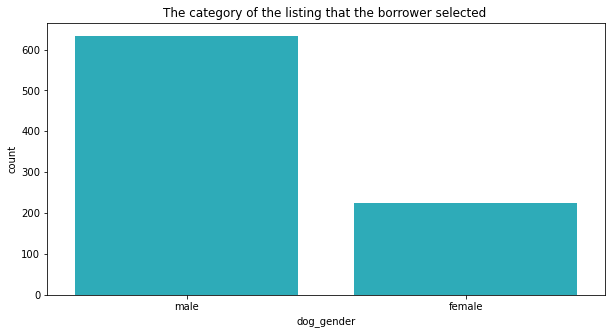

In [8]:

plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[9]
plt.title("The category of the listing that the borrower selected ")
sb.countplot(data = twitter_enhanced_clean, x = 'dog_gender', color = base_color,
             order = twitter_enhanced_clean['dog_gender'].value_counts().index );

## Which dog tweets more  if it's life_stage is considered?
so its is clear from evidend tha we do not now the life stage of dogs are not known who are there in weratedogs but the order will be pupper followed by doggo followed by puppo then last floofer.

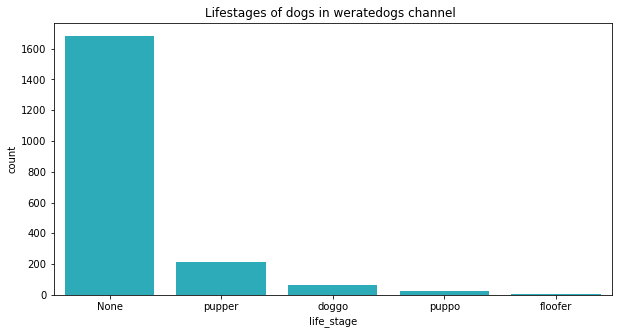

In [11]:
# 
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[9]
plt.title("Lifestages of dogs in weratedogs channel ")
sb.countplot(data = twitter_enhanced_clean, x = 'life_stage', color = base_color,
             order = twitter_enhanced_clean['life_stage'].value_counts().index );

# Correlation study for finding relation

There is a high dependency between :
1. retweets and favourites.
2. user_favorites and user_follwers

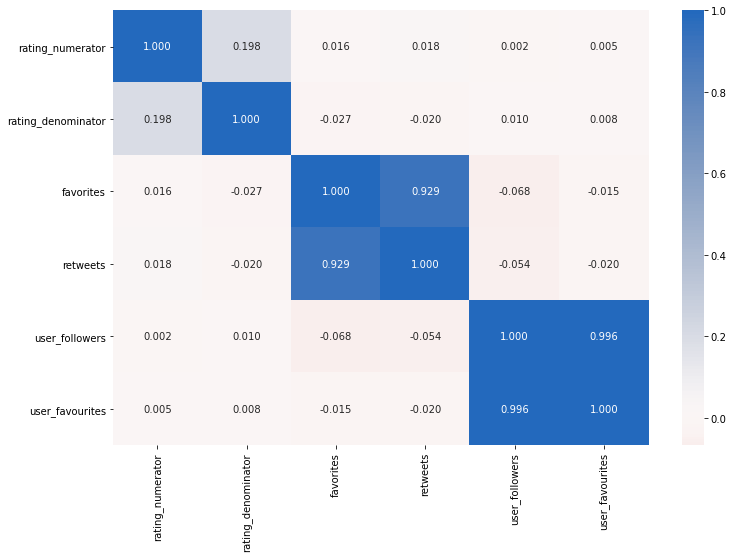

In [10]:
# correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(twitter_enhanced_clean[twitter_enhanced_clean.columns].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

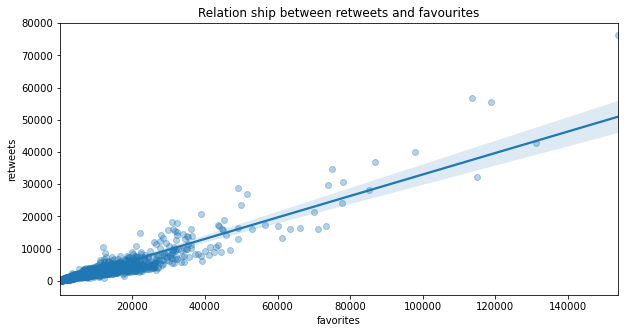

In [13]:
plt.figure(figsize=[10,5])
sb.regplot(data = twitter_enhanced_clean, x = 'favorites', y = 'retweets', fit_reg = True,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});
plt.title("Relation ship between retweets and favourites");

Text(0.5, 1.0, 'Relationship between user_follower and used_favourites')

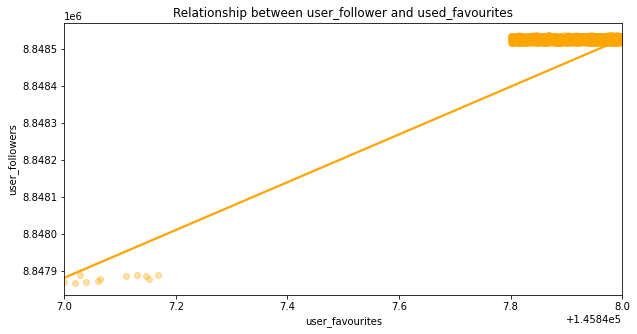

In [15]:
plt.figure(figsize=[10,5])
sb.regplot(data = twitter_enhanced_clean, x = 'user_favourites', y = 'user_followers',color='orange', fit_reg = True,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
plt.title("Relationship between user_follower and used_favourites")

* more user_favorites more user_followers

In [ ]:
twitter_enhanced_clean.name.value_counts()

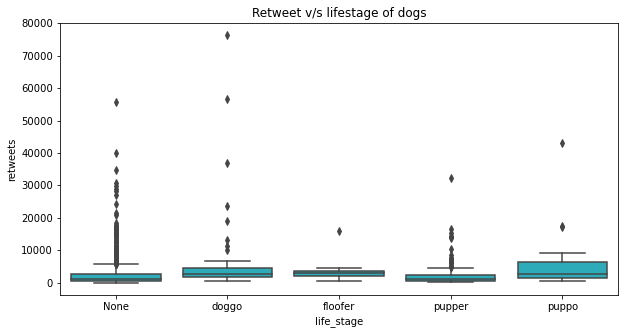

In [17]:
plt.figure(figsize=[10,5])
sb.boxplot(data = twitter_enhanced_clean, x='life_stage',y = 'retweets',color = sb.color_palette()[9]);
plt.title("Retweet v/s lifestage of dogs");